In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime

date_st = datetime(2010,3, 1)

date_dn = datetime(2022,11,4)
df = pd.read_csv("xauusd.csv")

In [3]:
for i, d in enumerate(df["Date"]):
    df["Date"][i] = df["Date"][i].replace("/","-")
    if len(df["Date"][i].split("-")[1]) != 2 and len(df["Date"][i].split("-")[2]) != 2:
        df["Date"][i] = df["Date"][i].split("-")[0] + "-0" + df["Date"][i].split("-")[1] +"-0"+df["Date"][i].split("-")[2]
    elif len(df["Date"][i].split("-")[1]) != 2:
        df["Date"][i] = df["Date"][i].split("-")[0] + "-0" + df["Date"][i].split("-")[1] +"-"+df["Date"][i].split("-")[2]
    elif len(df["Date"][i].split("-")[2]) != 2:
        df["Date"][i] = df["Date"][i].split("-")[0] + "-" + df["Date"][i].split("-")[1] +"-0"+df["Date"][i].split("-")[2]
df["Date"] = pd.to_datetime(df["Date"],format="%Y/%m/%d")

# print(df["Date"])
#datetime型にした日付をインデックス化
df=df.set_index("Date")
df.head()

C:\Users\cre\AppData\Local\Temp\ipykernel_9896\1485281796.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Date"][i] = df["Date"][i].replace("/","-")


,Date,Open,High,Low,Close
0,2010-03-01,1118.60,1122.72,1111.22,1116.30
1,2010-03-02,1116.63,1136.58,1114.03,1133.18
2,2010-03-03,1133.10,1144.08,1131.43,1139.30
3,2010-03-04,1138.68,1140.63,1125.33,1131.25
4,2010-03-05,1131.78,1139.63,1127.03,1133.90


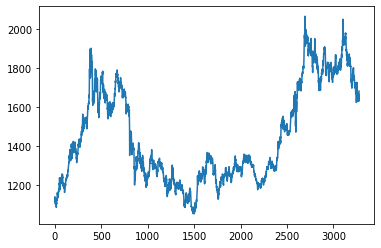

In [5]:
df['Close'].plot(); # 終値の可視化

In [25]:
!pip install ephem

In [26]:
!pip install pystan

  Using cached pystan-3.5.0-py3-none-any.whl (13 kB)
  Using cached pysimdjson-3.2.0-cp38-cp38-win_amd64.whl (151 kB)
  Using cached aiohttp-3.8.3-cp38-cp38-win_amd64.whl (324 kB)
  Using cached clikit-0.6.2-py2.py3-none-any.whl (91 kB)
     --------------------------------------- 79.8/79.8 MB 38.4 MB/s eta 0:00:00
  Using cached Cython-0.29.32-py2.py3-none-any.whl (986 kB)


In [32]:
!pip install prophet

     --------------------------------------- 12.1/12.1 MB 20.5 MB/s eta 0:00:00
     ---------------------------------------- 81.2/81.2 kB ? eta 0:00:00
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5


In [41]:
from prophet import Prophet# ライブラリの読み込み
# 列名の変更
data = df.reset_index().rename(columns={'Date': 'ds', 'Close': 'y'})
# インスタンス化
model = Prophet()
# 学習
model.fit(data)

14:22:54 - cmdstanpy - INFO - Chain [1] start processing
14:22:55 - cmdstanpy - INFO - Chain [1] done processing


In [60]:
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

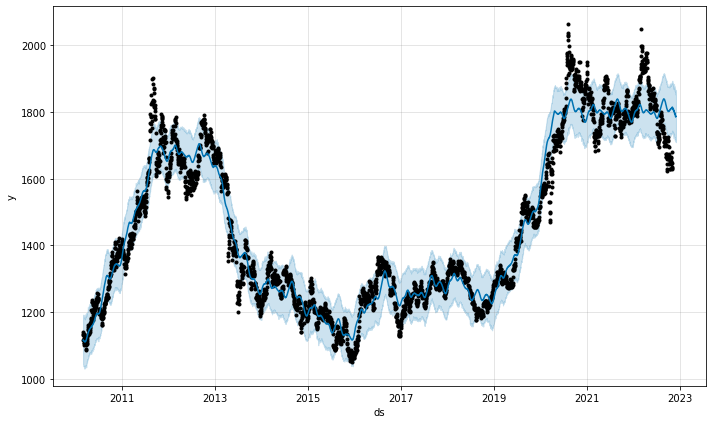

In [61]:
model.plot(forecast)
plt.show()

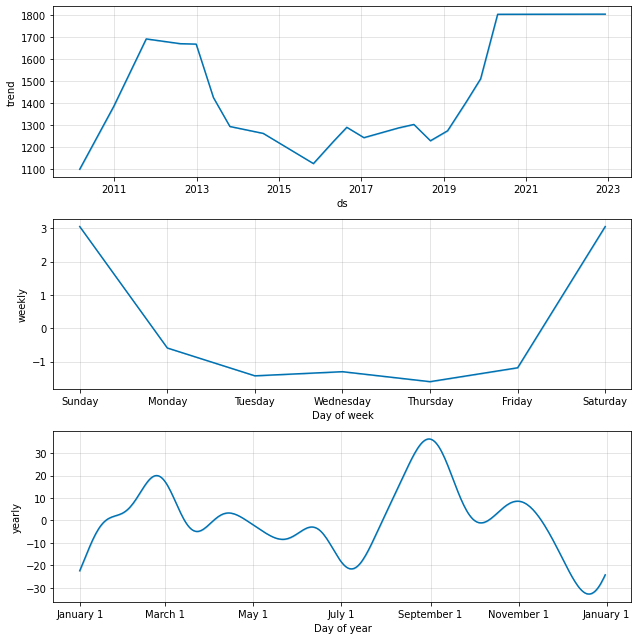

In [44]:
model.plot_components(forecast)
plt.show()

In [46]:
# ライブラリのインストール
!pip install plotly
# ライブラリのインポート
from prophet.plot import plot_plotly
import plotly.offline as py

PlotlyError: The `figure_or_data` positional argument must be `dict`-like, `list`-like, or an instance of plotly.graph_objs.Figure

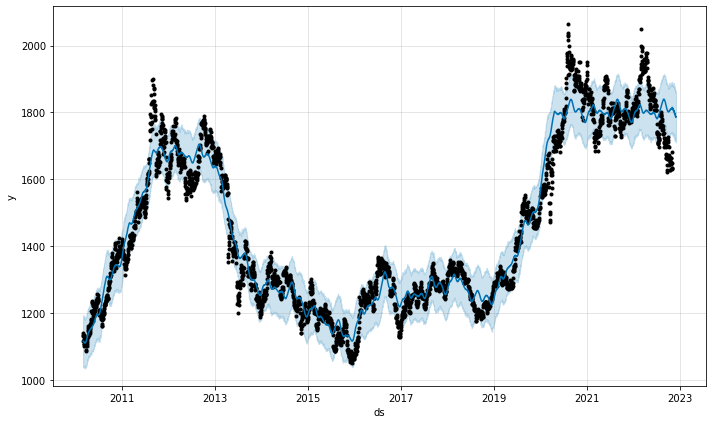

In [49]:
# 描画
fig1 = model.plot(forecast)
# ノードブック上に出力